In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)
import time

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge, Lasso

# Data Visualization

In [15]:
df = pd.read_csv('CE9010_cleaned_data.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               302 non-null    object 
 1   price               302 non-null    float64
 2   brand               302 non-null    object 
 3   resolution          302 non-null    object 
 4   screen_size         302 non-null    float64
 5   level_1_model       302 non-null    object 
 6   processor           302 non-null    object 
 7   processor_speed     302 non-null    float64
 8   ram                 302 non-null    float64
 9   warranty            302 non-null    int64  
 10  link                302 non-null    object 
 11  description         199 non-null    object 
 12  weight              161 non-null    float64
 13  hdd_gb              64 non-null     float64
 14  ssd_gb              230 non-null    float64
 15  graphic_card        176 non-null    object 
 16  hdd_exis

In [17]:
df['brand'].unique()

array(['apple', 'dell', 'lenovo', 'siemens', 'hp', 'aftershock',
       'fujitsu', 'asus', 'compaq', 'acer', 'msi', 'asuspro', 'panasonic',
       'toshiba', 'medion', 'gigabyte', 'microsoft', 'razer'],
      dtype=object)

In [18]:
price_brand = df[['price', 'brand']].groupby('brand').mean().sort_values('price', ascending = False)
price_brand.head()

,price
brand,
gigabyte,1536.500000
siemens,1481.325714
medion,1471.640000
msi,1419.553333
apple,1185.407907


Text(0.5, 1.0, 'AVG Price vs Brand')

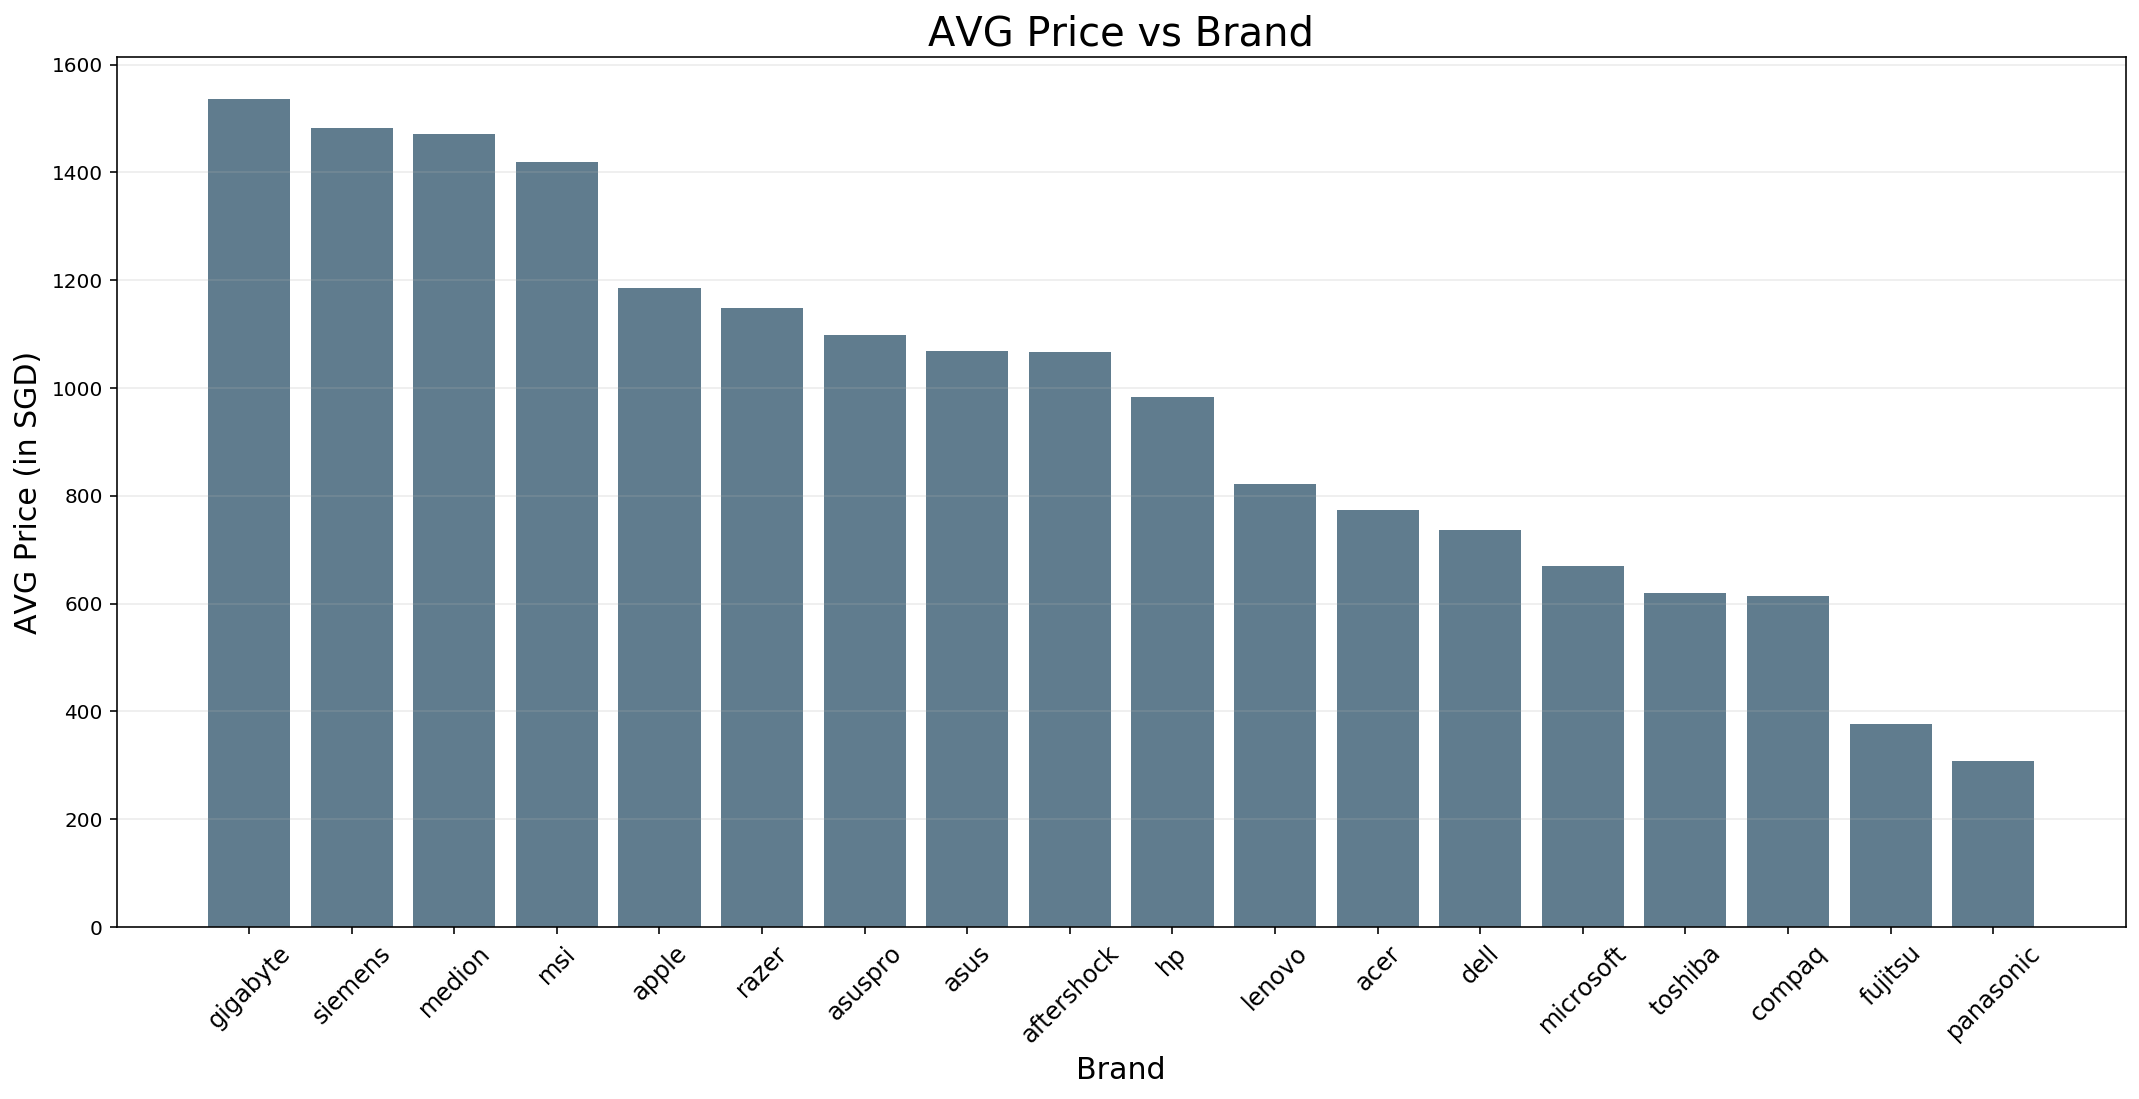

In [19]:
# version 1
colors_map = {'hp': '#003f5c', 
              'dell': '#2f4b7c', 
              'gigabyte': '#665191', 
              'asus': '#a05195', 
              'msi': '#d45087', 
              'siemens': '#f95d6a', 
              'medion': '#ff7c43',
              'apple': '#ffa600', 
              'aftershock': '#488f31', 
              'lenovo': '#bbba78', 
              'razer': '#eddbb9', 
              'asuspro': '#4a3933', 
              'acer': '#e48269',
              'toshiba': '#de425b', 
              'laptop': '#e45826', 
              'microsoft': '#85b172', 
              'compaq': '#f39189', 
              'fujitsu': '#6e7582', 
              'panasonic': '#67a052'}
plt.figure(figsize = (18,8))
# plt.bar(price_brand.index, price_brand.price, color = list(price_brand.index.map(colors_map)))
plt.bar(price_brand.index, price_brand.price, color = '#607c8e')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('AVG Price (in SGD)', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 45)
plt.grid(axis = 'y', linewidth = 0.2)
plt.title('AVG Price vs Brand', fontsize = 20)

<b> Analysis: </b> <br>
Gigabyte is the brand with the highest average refurbished laptop price (~ SGD 1500), while Panasonic is the brand with the lowest average refurbished laptop price (~ SGD 350)

In [20]:
price_brmodel = df[['price', 'brand', 'level_1_model']].groupby(['brand','level_1_model']).mean().sort_values('price', ascending = False).reset_index()
price_brmodel.head()

,brand,level_1_model,price
0,hp,zbook,2974.714286
1,dell,xps,2696.090000
2,gigabyte,aero,2024.000000
3,asus,rog,1999.000000
4,msi,gf75,1815.040000


In [21]:
price_brmodel.brand.unique()

array(['hp', 'dell', 'gigabyte', 'asus', 'msi', 'siemens', 'medion',
       'apple', 'aftershock', 'lenovo', 'razer', 'asuspro', 'acer',
       'toshiba', 'microsoft', 'compaq', 'fujitsu', 'panasonic'],
      dtype=object)

Text(0.5, 1.0, 'Level 1 Model vs AVG Price')

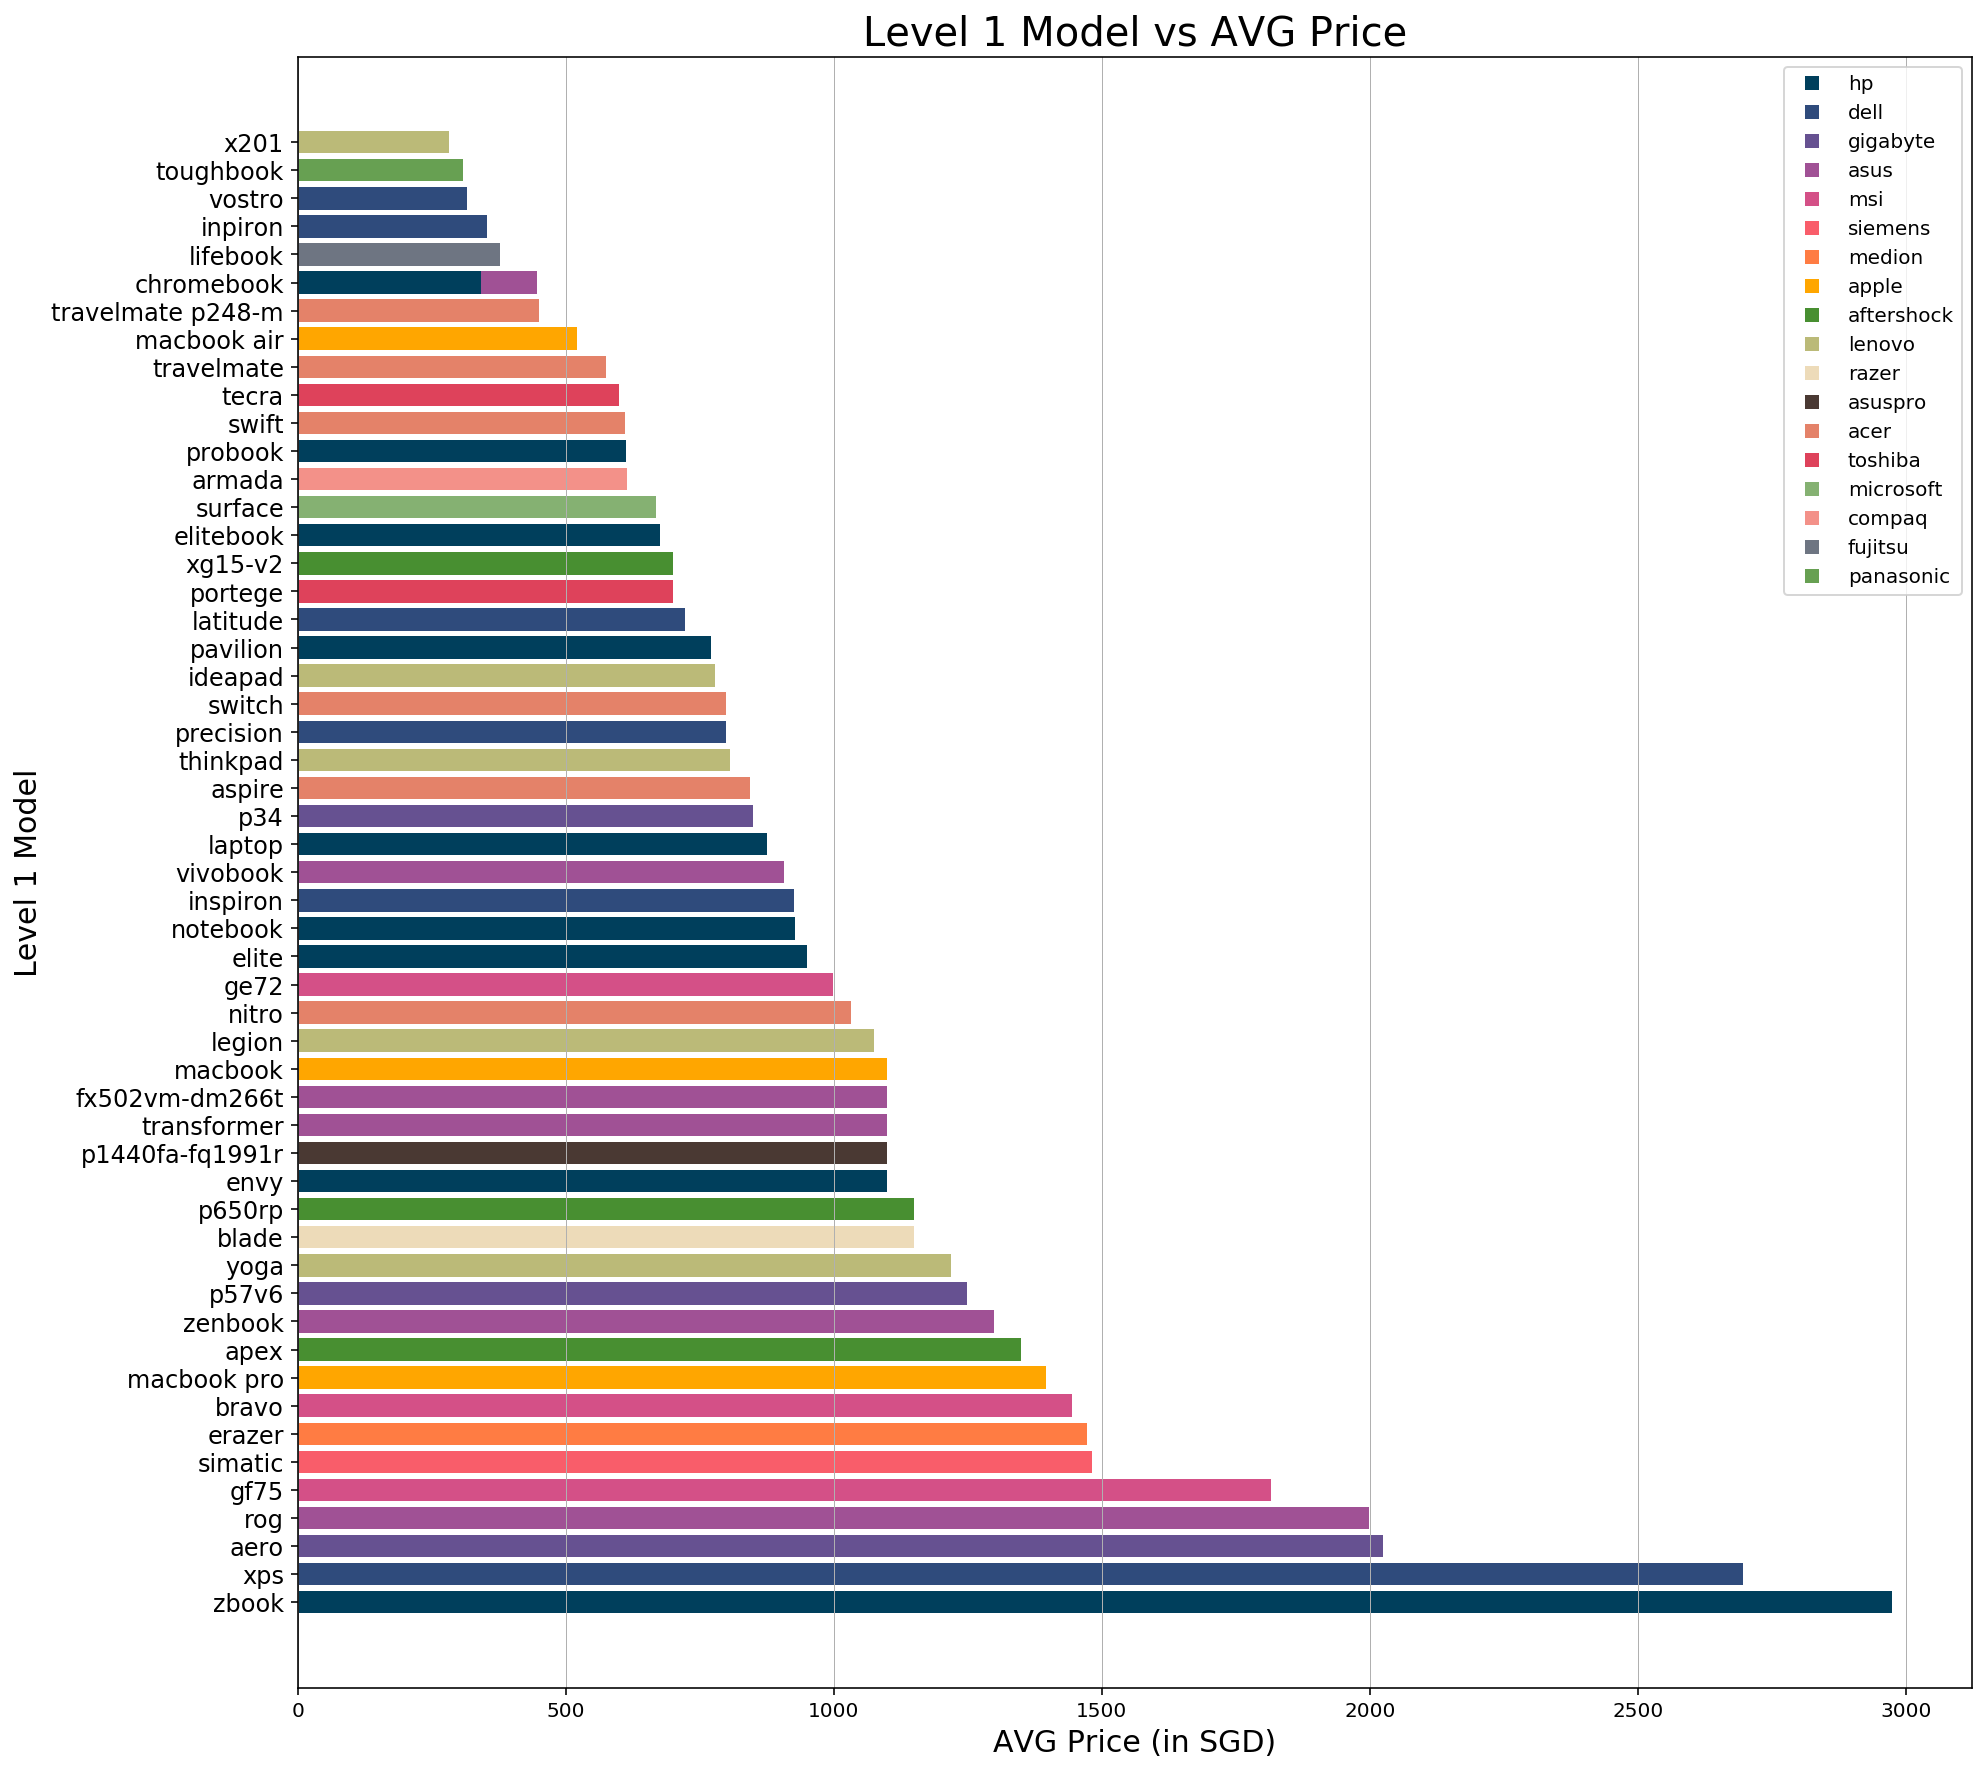

In [22]:
# version 3
colors_map = {'hp': '#003f5c', 
              'dell': '#2f4b7c', 
              'gigabyte': '#665191', 
              'asus': '#a05195', 
              'msi': '#d45087', 
              'siemens': '#f95d6a', 
              'medion': '#ff7c43',
              'apple': '#ffa600', 
              'aftershock': '#488f31', 
              'lenovo': '#bbba78', 
              'razer': '#eddbb9', 
              'asuspro': '#4a3933', 
              'acer': '#e48269',
              'toshiba': '#de425b', 
              'microsoft': '#85b172', 
              'compaq': '#f39189', 
              'fujitsu': '#6e7582', 
              'panasonic': '#67a052'}
plt.figure(figsize = (15,15))
plt.barh(price_brmodel.level_1_model, price_brmodel.price, color = list(price_brmodel.brand.map(colors_map)))
plt.ylabel('Level 1 Model', fontsize = 15)
plt.xlabel('AVG Price (in SGD)', fontsize = 15)
plt.yticks(fontsize = 12)
plt.grid(axis = 'x', linewidth = 0.5)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='s', linestyle='') for color in colors_map.values()]
plt.legend(markers,colors_map.keys(), numpoints=1)
plt.title('Level 1 Model vs AVG Price', fontsize = 20)

<b> Analysis: </b> <br>
Zbook is the model with the highest average refurbished laptop price (~ SGD 470), while x201 is the model with the lowest average refurbished laptop price (~ SGD 350)

In [10]:
brand_c = df['brand'].value_counts()
brand_c.head()

lenovo    82
hp        54
dell      52
apple     43
asus      27
Name: brand, dtype: int64

Text(0.5, 1.0, 'Histogram of Brand')

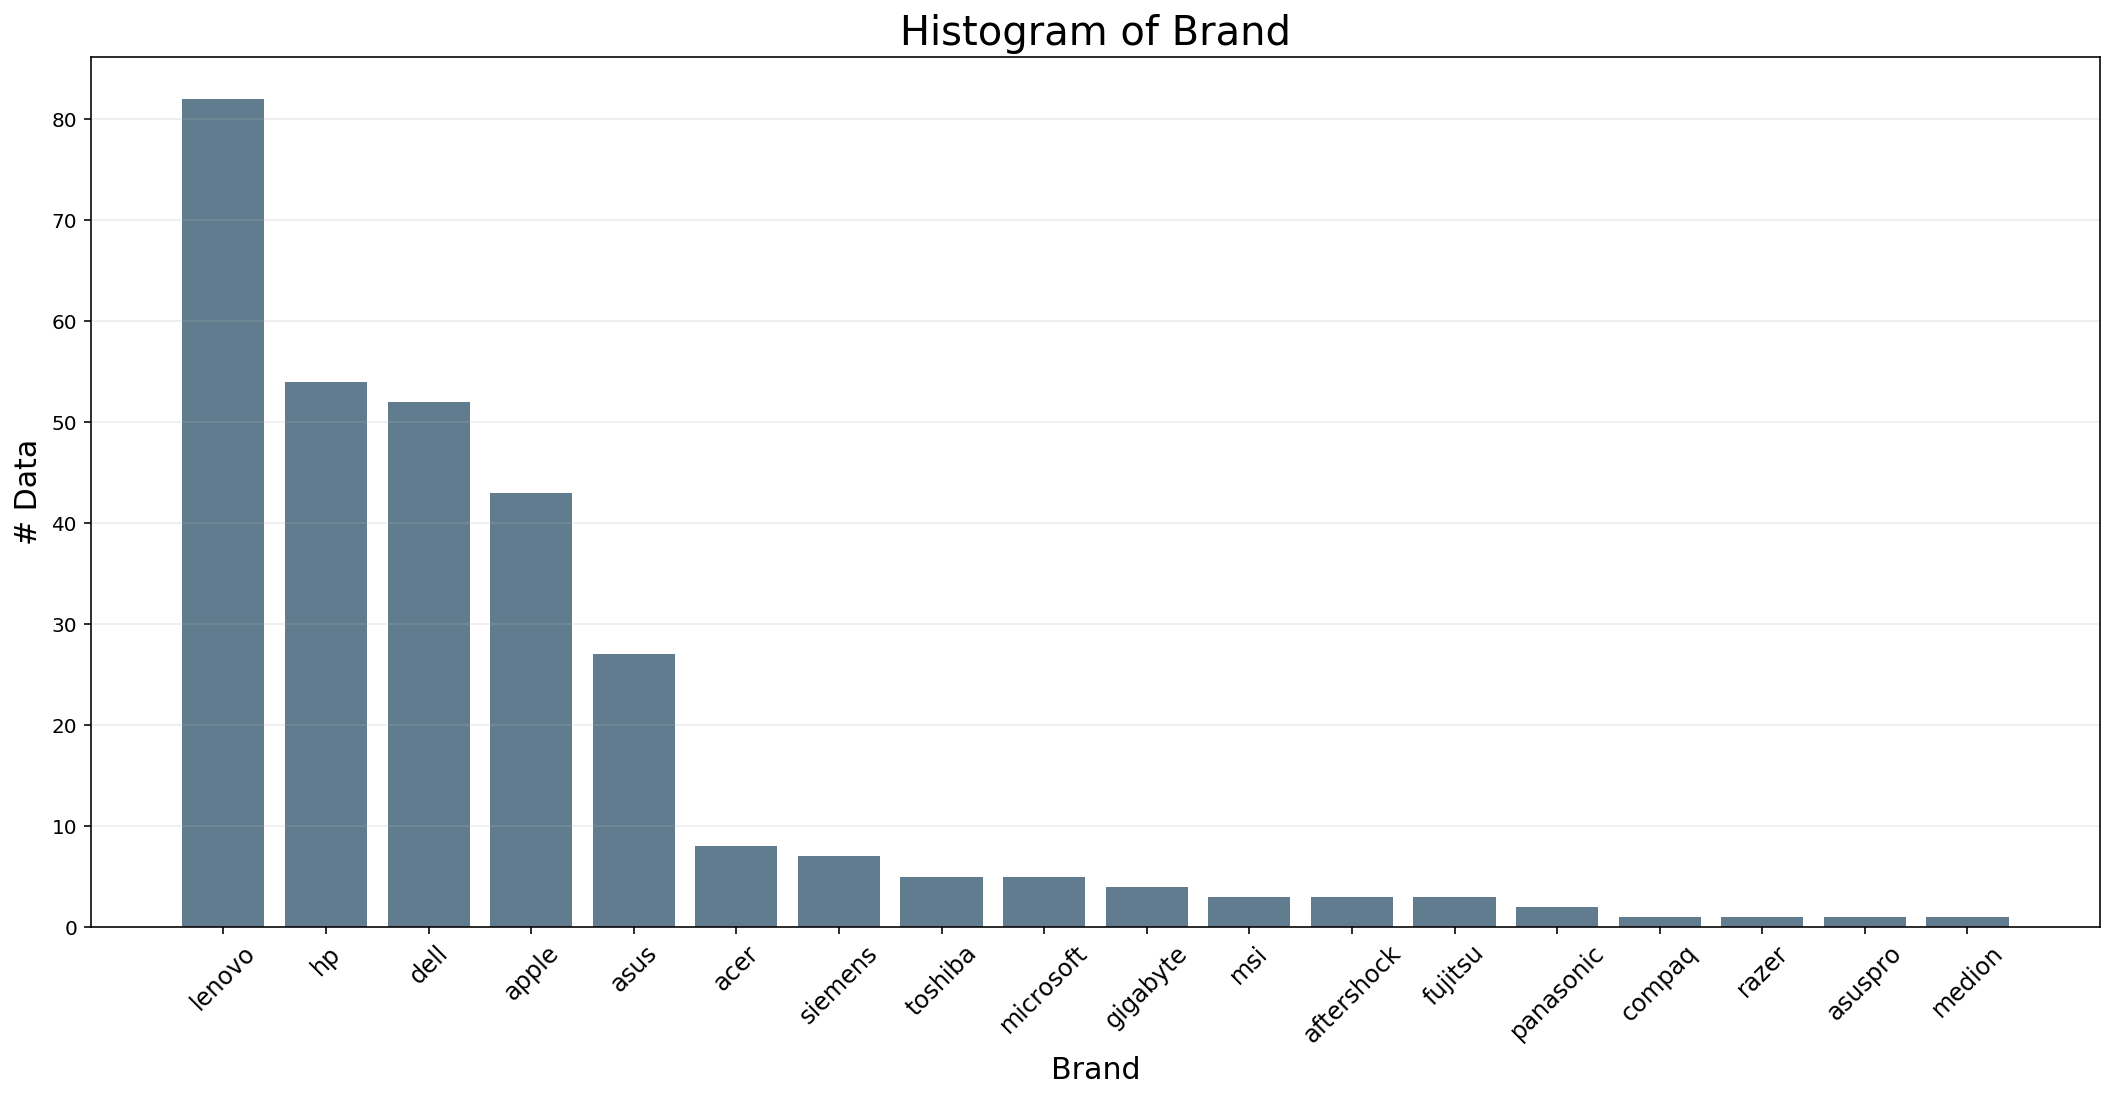

In [11]:
# Histogram of Brand
plt.figure(figsize = (18,8))
plt.bar(brand_c.index, brand_c, color = '#607c8e')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('# Data', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 45)
plt.grid(axis = 'y', linewidth = 0.2)
plt.title('Histogram of Brand', fontsize = 20)

<b> Analysis: </b> <br>
Lenovo has the highest number of listings in refurbished laptops marketplace.

In [12]:
l1model_c = df['level_1_model'].value_counts()
l1model_c.head()

thinkpad       62
latitude       42
macbook pro    30
elitebook      19
ideapad        13
Name: level_1_model, dtype: int64

Text(0.5, 1.0, 'Histogram of Level 1 Model')

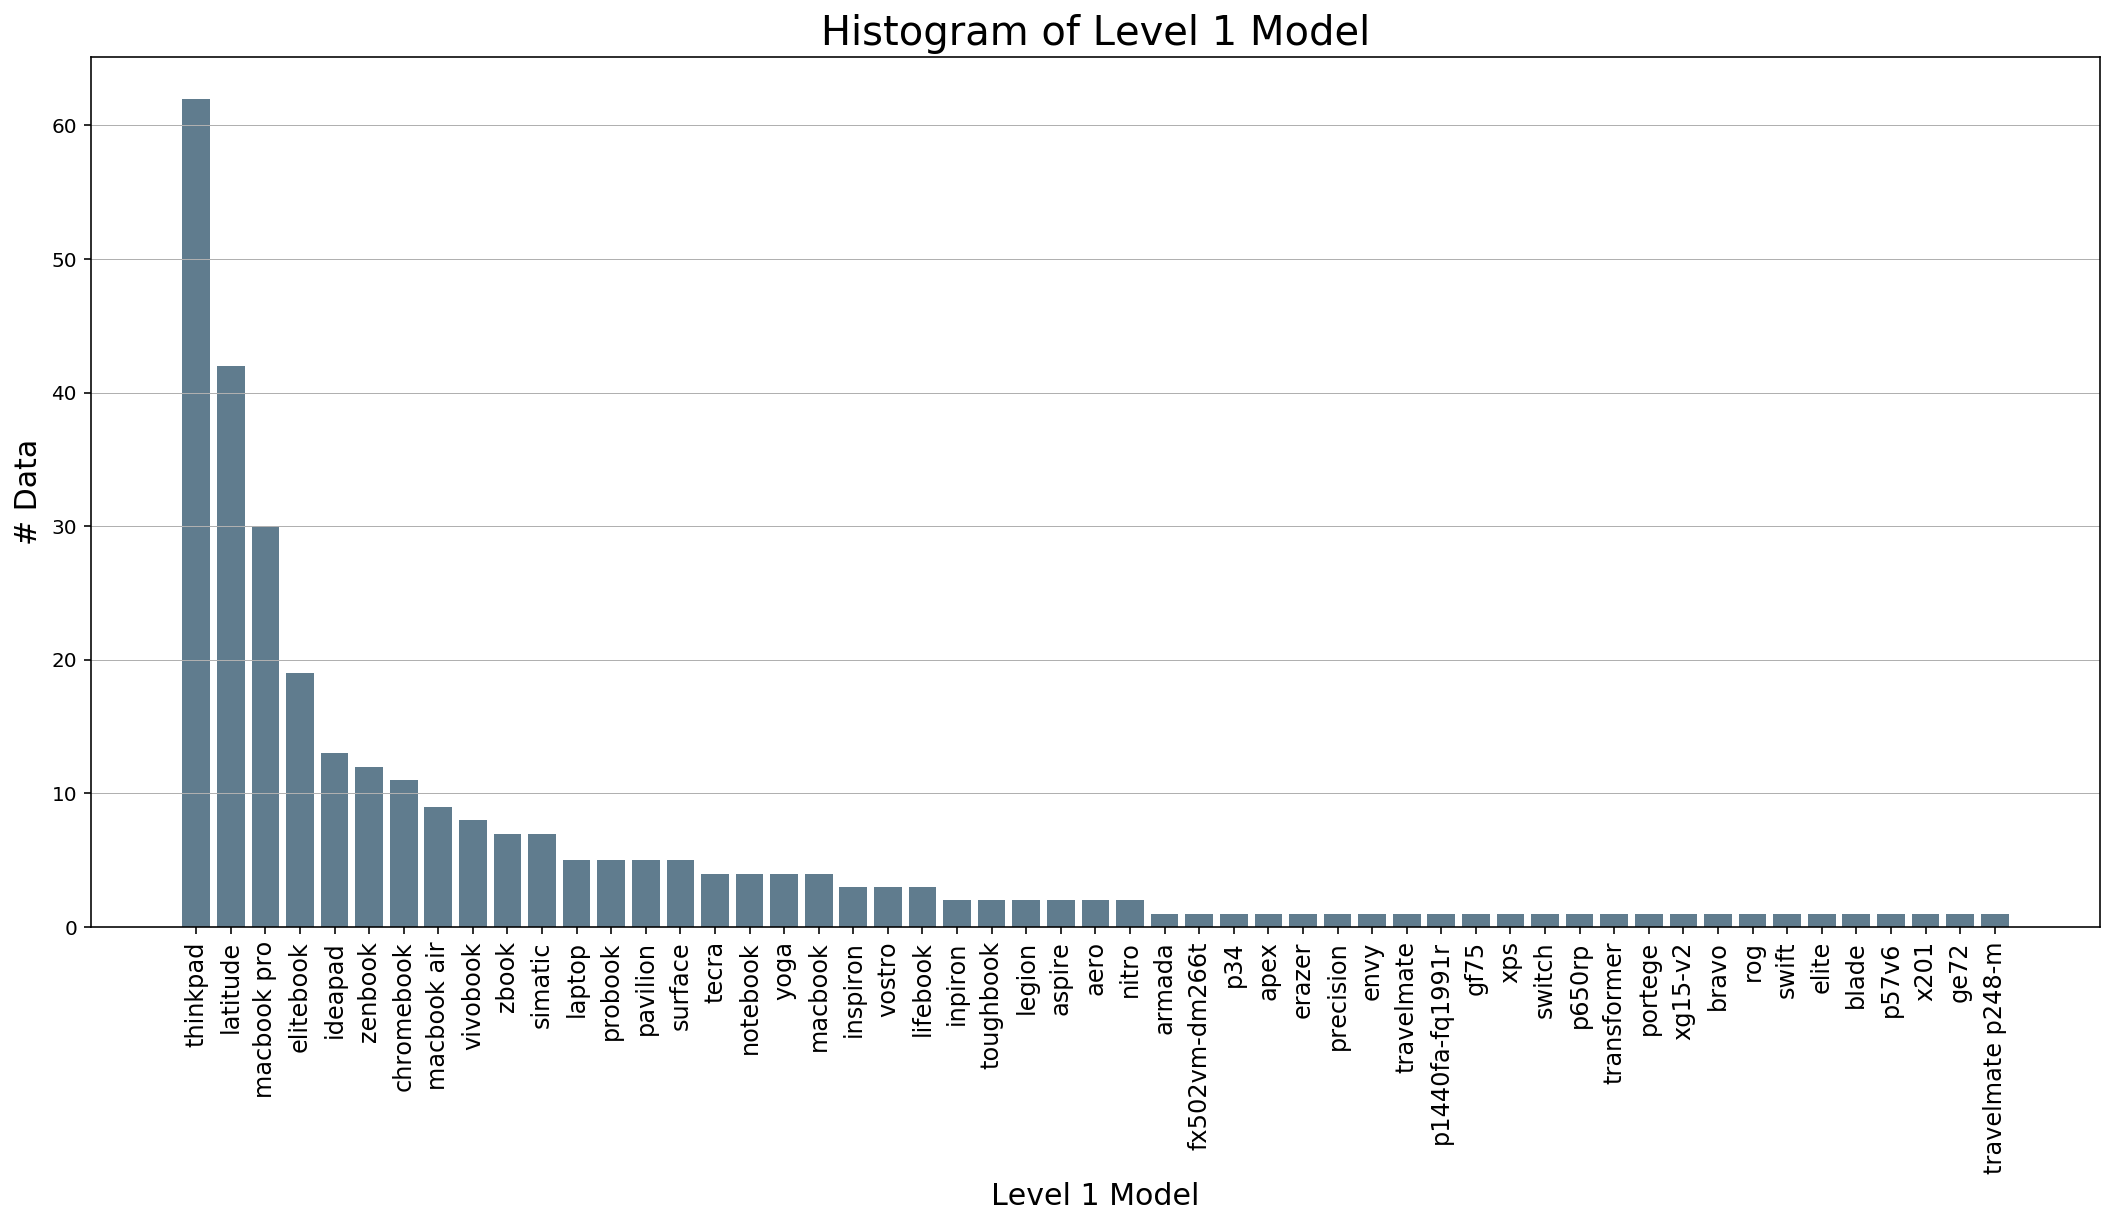

In [23]:
plt.figure(figsize = (18,8))
plt.bar(l1model_c.index, l1model_c, color = '#607c8e')
plt.xlabel('Level 1 Model', fontsize = 15)
plt.ylabel('# Data', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 90)
plt.grid(axis = 'y', linewidth = 0.5)
plt.title('Histogram of Level 1 Model', fontsize = 20)

<b> Analysis: </b> <br>
Thinkpad has the highest number of listings in refurbished laptops marketplace.

Text(0.5, 1.0, 'Histogram of Price')

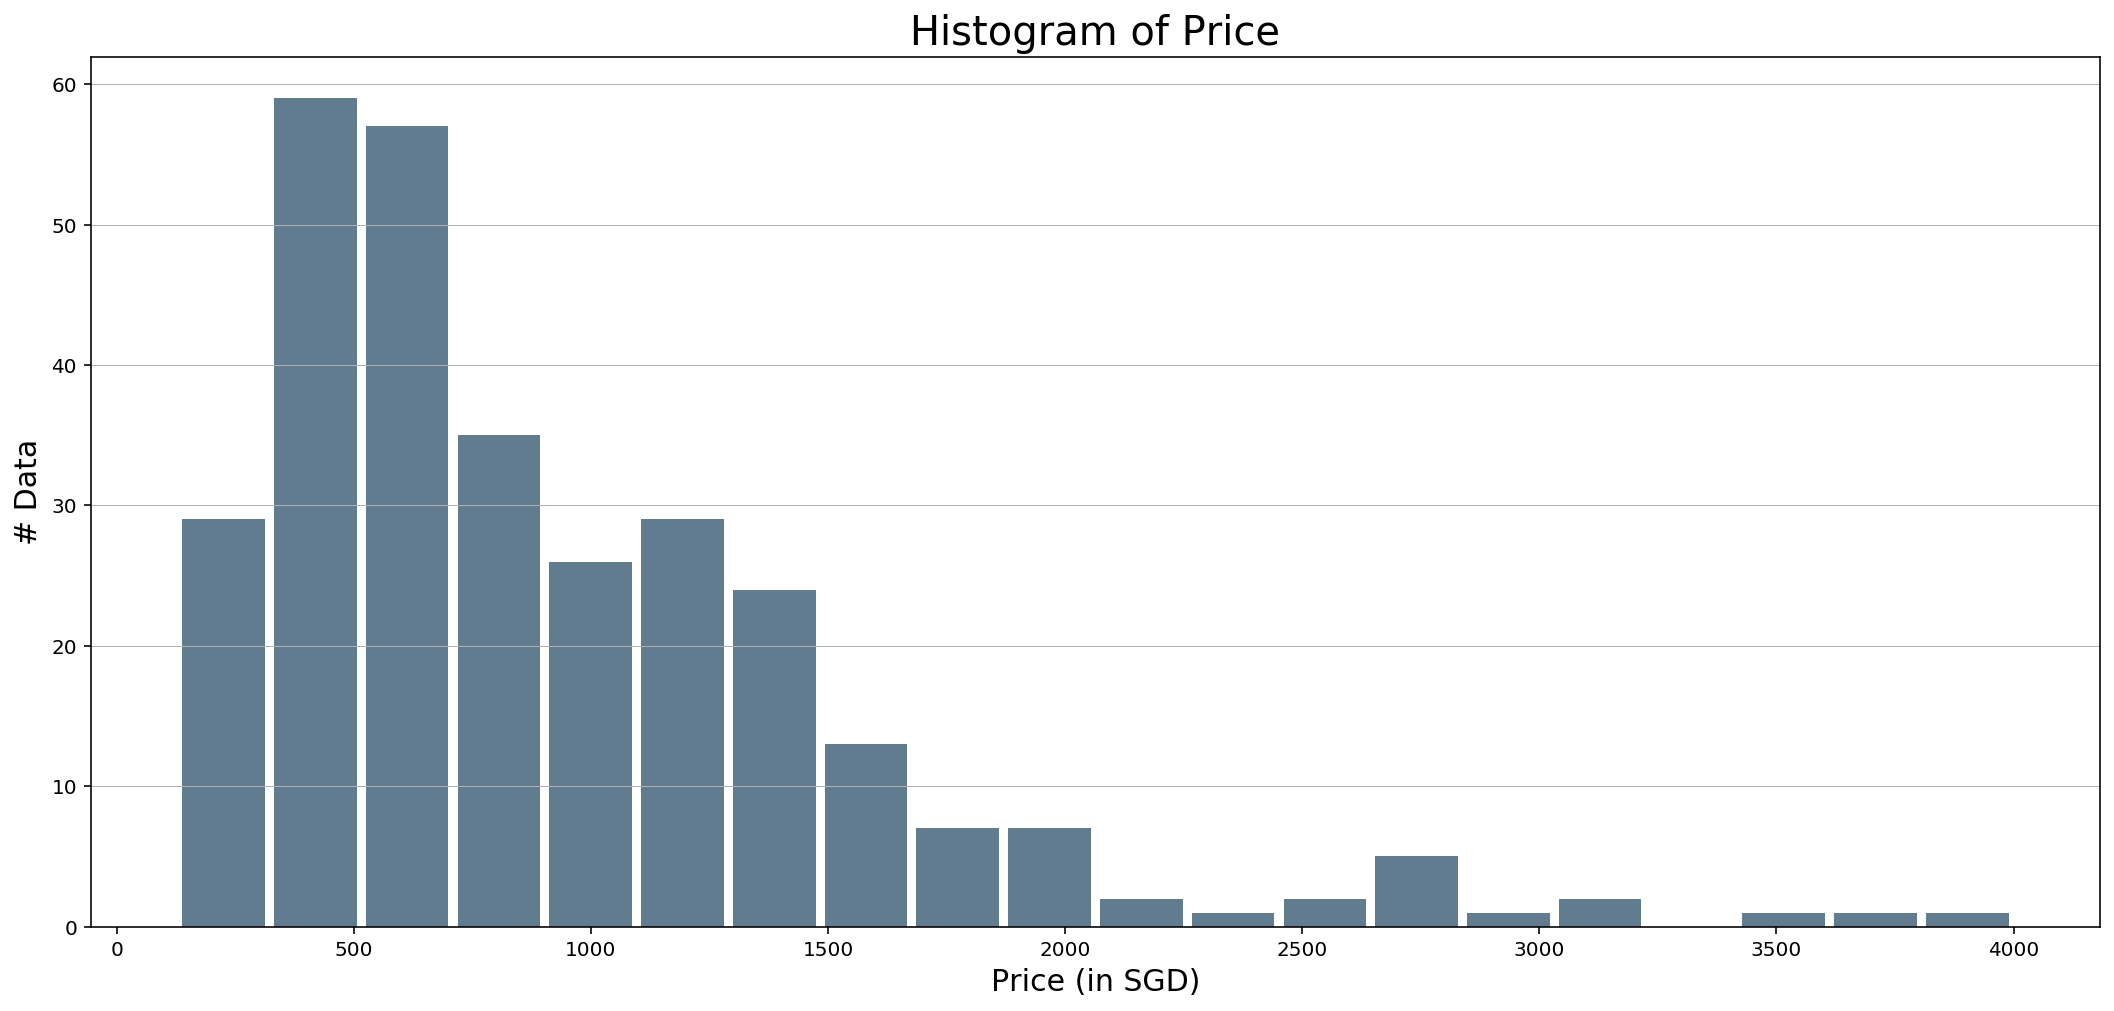

In [24]:
plt.figure(figsize = (18,8))
df['price'].plot.hist(bins = 20, rwidth = 0.9, color = '#607c8e')
plt.xlabel('Price (in SGD)', fontsize = 15)
plt.ylabel('# Data', fontsize = 15)
plt.grid(axis = 'y', linewidth = 0.5)
plt.title('Histogram of Price', fontsize = 20)

# Categorical Features Encoding

In [25]:
res_map = {'vga': 1,
          'xga': 2,
          'hd': 3,
          'wxga+': 4,
          'sxga': 5,
          'hd+': 6,
          'fhd': 7,
          'fhd+': 8,
          'qhd': 9,
          'wqhd': 10,
          'wqxga': 11,
          'qwxga+': 12,
          'qhd+': 13,
          'uhd': 14}
df['resolution'] = df['resolution'].apply(lambda x: res_map[x])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               302 non-null    object 
 1   price               302 non-null    float64
 2   brand               302 non-null    object 
 3   resolution          302 non-null    int64  
 4   screen_size         302 non-null    float64
 5   level_1_model       302 non-null    object 
 6   processor           302 non-null    object 
 7   processor_speed     302 non-null    float64
 8   ram                 302 non-null    float64
 9   warranty            302 non-null    int64  
 10  link                302 non-null    object 
 11  description         199 non-null    object 
 12  weight              161 non-null    float64
 13  hdd_gb              64 non-null     float64
 14  ssd_gb              230 non-null    float64
 15  graphic_card        176 non-null    object 
 16  hdd_exis

In [27]:
df_dummies = pd.get_dummies(df, columns = ['brand', 'level_1_model'])

In [28]:
# df_dummies

In [29]:
df_dummies.drop(['title', 'link', 'description', 'graphic_card', 'weight', 
                 'hdd_gb', 'ssd_gb', 'processor'], axis = 1, inplace = True)

In [30]:
df_dummies.shape

(302, 81)

In [31]:
# train_test_split
data_x = df_dummies.drop('price', axis = 1)
data_y = df_dummies['price']
x_train, x_test, y_train, y_test = train_test_split(df_dummies.drop('price', axis = 1), 
                                                   df_dummies['price'], test_size = 0.33, random_state = 28)

# Gradient Boosting Regressor

Gradient boosting is one of the most powerful techniques for building predictive models [1]. It combines the predictions from multiple weak learners sequentially to generate a strong predictive model. Some advantages of gradient boosting are:
1. One does not need to pre-process the data (in most cases)
2. It works well with categorical and numerical data

Although Gradient Boosting Regressor tends to be computationally expensive, we believe that the advantages outweigh this disadvantage for our data because our data size is relatively small. Thus, Gradient Boosting Regressor might be a suitable model for our data.

<br>

References:<br>
[1] https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/ <br>
[2] https://medium.com/analytics-vidhya/introduction-to-the-gradient-boosting-algorithm-c25c653f826b

In [32]:
def gbrt(x_train, x_test, y_train, y_test):
    
    start = time.time()
    
    model = GradientBoostingRegressor()
    
    model_name = 'Gradient Boosting Regressor'
    param_grid = {
                'n_estimators': [100,500], 
                'learning_rate': [0.1,0.05,0.5201,0.02],
                'max_depth': [1,2,3,4], 
                'min_samples_leaf': [1,2,3], 
                'max_features': [1.0],
                'random_state': [28],
                'min_samples_split': [2]
                } 
    
    gsc = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3)
    grid_result = gsc.fit(x_train, y_train)
    
    print('Best parameters set found = ', grid_result.best_params_)
    y_pred = grid_result.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    print('MAE for ', model_name, ' is ', mae)
    
    print('Time = ', time.time() - start)

In [33]:
gbrt(x_train, x_test, y_train, y_test)

Best parameters set found =  {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500, 'random_state': 28}
MAE for  Gradient Boosting Regressor  is  216.73153103597767
Time =  29.623602628707886


# Regularization with Ridge and Lasso Regression

In order to prevent overfitting and reduce model complexity in regression model, one needs to utilize regularization method. Two regularization methods that we use in this project are Ridge and Lasso Regression. The difference between the methods is the regularization loss:
1. Regularization loss for Ridge Regression = $\lambda \sum_{j = 0}^{p} \beta^{2}$
2. Regularization loss for Lasso Regression = $\lambda \sum_{j = 0}^{p} \lvert \beta \rvert$

# Ridge Regression

In [34]:
def ridge(x_train, x_test, y_train, y_test):
    
    start = time.time()
    
    model = Ridge()
    
    model_name = 'Ridge Regressor'
    param_grid = {
                'alpha': [1,2,3], 
                'fit_intercept': [True, False],
                'normalize': [True, False],
                'random_state': [28, None],
                'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
                } 
    
    gsc = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3)
    grid_result = gsc.fit(x_train, y_train)
    
    print('Best parameters set found = ', grid_result.best_params_)
    y_pred = grid_result.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    print('MAE for ', model_name, ' is ', mae)
    
    print('Time = ', time.time() - start)

In [35]:
ridge(x_train, x_test, y_train, y_test)

Best parameters set found =  {'alpha': 2, 'fit_intercept': False, 'normalize': True, 'random_state': 28, 'solver': 'svd'}
MAE for  Ridge Regressor  is  224.48417512119613
Time =  8.805094480514526


# Lasso Regression

In [36]:
def lasso(x_train, x_test, y_train, y_test):
    
    start = time.time()
    
    model = Lasso()
    
    model_name = 'Lasso Regressor'
    param_grid = {
                'alpha': [1,2,3], 
                'fit_intercept': [True, False],
                'normalize': [True, False],
                'random_state': [28, None]
                } 
    
    gsc = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3)
    grid_result = gsc.fit(x_train, y_train)
    
    print('Best parameters set found = ', grid_result.best_params_)
    y_pred = grid_result.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    print('MAE for ', model_name, ' is ', mae)
    
    print('Time = ', time.time() - start)

In [37]:
lasso(x_train, x_test, y_train, y_test)

Best parameters set found =  {'alpha': 3, 'fit_intercept': False, 'normalize': True, 'random_state': 28}
MAE for  Lasso Regressor  is  219.43588430475057
Time =  0.37499547004699707


# MLP (Multi-layered Perceptron) -- haven't found the best way to make it converge

In [38]:
# haven't finished this
def mlp(x_train, x_test, y_train, y_test):
    
    start = time.time()
    
    model = MLPRegressor()
    
    model_name = 'MLP Regressor'
    param_grid = {
                'activation': ['relu','tanh','logistic'],
                'alpha': [0.0001, 0.05],
                'learning_rate': ['constant','adaptive'],
                'solver': ['adam', 'lbfgs', 'sgd'],
                'max_iter': [10000]
                } 
    
    gsc = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3)
    grid_result = gsc.fit(x_train, y_train)
    
    print('Best parameters set found = ', grid_result.best_params_)
    y_pred = grid_result.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    print('MAE for ', model_name, ' is ', mae)
    
    print('Time = ', time.time() - start)

In [39]:
# mlp(x_train, x_test, y_train, y_test)